### Importing the libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [20]:
df = pd.read_csv("Breast_cancer.txt")

### Head() shows the first 5 rows of the data

In [21]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


### shape of the data set

In [22]:
df.shape

(569, 6)

### Information about the data set to know the data types 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


### Check any null values present in the data

df.isnull().sum()

### Describing the data

In [24]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


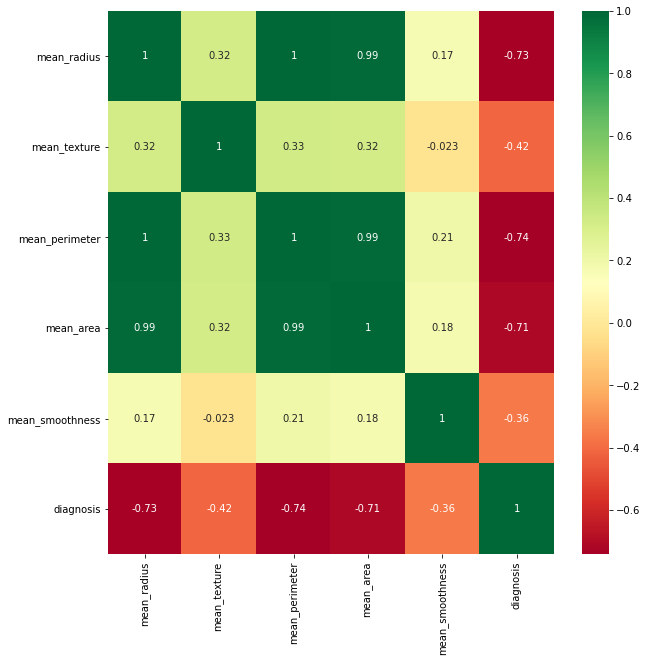

In [25]:
plt.figure(figsize=(10,10))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn') 

Text(0.5, 1.0, 'Diagnosis vs radius_mean')

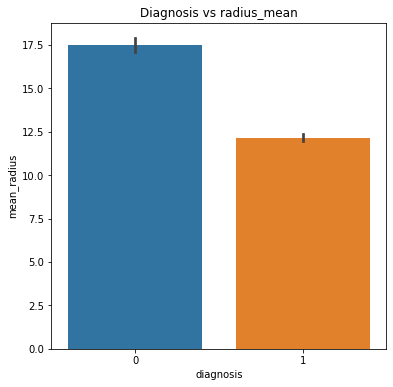

In [26]:

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'mean_radius', data = df)

plt.title('Diagnosis vs radius_mean')

Text(0.5, 1.0, 'Diagnosis vs mean_texture')

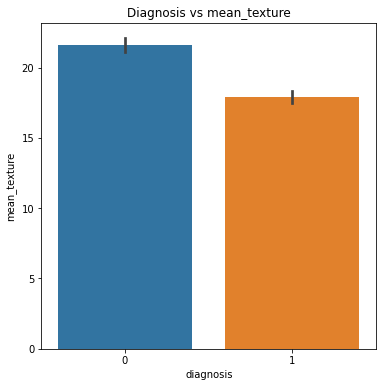

In [27]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'mean_texture', data = df)

plt.title('Diagnosis vs mean_texture')

Text(0.5, 1.0, 'Diagnosis vs mean_perimeter')

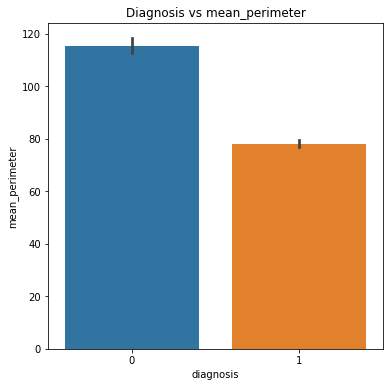

In [28]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'mean_perimeter', data = df)

plt.title('Diagnosis vs mean_perimeter')

Text(0.5, 1.0, 'Diagnosis vs mean_area')

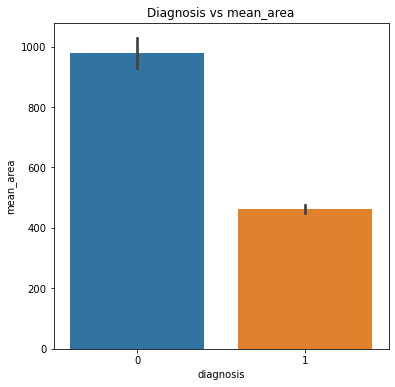

In [29]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'mean_area', data = df)

plt.title('Diagnosis vs mean_area')

Text(0.5, 1.0, 'Diagnosis vs mean_smoothness')

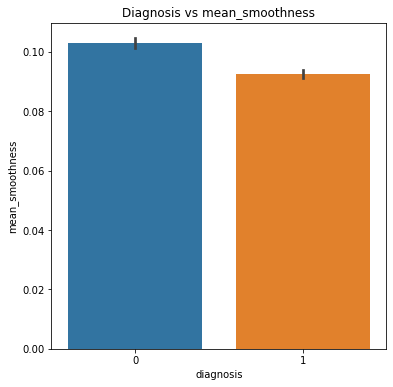

In [30]:
ig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'mean_smoothness', data = df)

plt.title('Diagnosis vs mean_smoothness')

### Data preprocessing

### splitting the features and target values

In [35]:
X= df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [37]:
#importing the libraries required to perform KNN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [67]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
Y_pred


array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [68]:
accuracy_score(Y_test,Y_pred)

0.9230769230769231

In [69]:
confusion_matrix(Y_test,Y_pred)

array([[41,  4],
       [ 7, 91]], dtype=int64)

### Rates as computed from the confusion matrix


### Accuracy: Overall, how often is the classifier correct?

(TP+TN)/total = (41+91)/143 = 0.92

### Misclassification Rate: Overall, how often is it wrong?

(FP+FN)/total = (4+7)/143 = 0.07 equivalent to 1 minus Accuracy also known as "Error Rate"

### True Positive Rate: When it's actually yes, how often does it predict 1?

TP/actual yes = 41/41+7 = 0.85 also known as "Sensitivity" or "Recall"

### False Positive Rate: When it's actually 0, how often does it predict 1?

FP/actual no = 4/95 = 0.04

In [71]:
print(classification_report(Y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        45
           1       0.96      0.94      0.95        98

    accuracy                           0.93       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



## PERFORMING SUPPORT VECTOR MACHINE

In [43]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 40)

In [64]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [65]:
svc = SVC()
svc.fit(X_train, Y_train)
pred_svc = svc.predict(X_test)

In [63]:
print(classification_report(Y_test, pred_svc))


              precision    recall  f1-score   support

           0       0.89      0.69      0.78        45
           1       0.87      0.96      0.91        98

    accuracy                           0.87       143
   macro avg       0.88      0.82      0.84       143
weighted avg       0.88      0.87      0.87       143



Observation:
There are two possible predicted classes: "1" and "0".  1 (indicates prescence of cancer cells) and  0 (indicates abscence).